<h1 style="background-color: #003d15; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Online Payments Fraud Detection</b>
</h1>
<div style="text-align: center; font-size:140%; font-weight: bold; color: #white;">
     Deep Learning Techniques
</div>
 
---
    
<div style="text-align: center;">
  <b>Cristhian Camilo Ocampo | Data Scientist | Dec 2024 </b>
    
  <br>
  Contact:
  <a href="https://www.linkedin.com/in/cristhian-camilo-ocampo-bolivar/">Linkedin</a> | 
  <a href="https://github.com/CCOcampo">GitHub</a> | 
</div>


# <p style="background-color:#003d15; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px; margin:0"> 1. Exploración de Datos</p>


### <font> <b>Conjunto de datos</b><font>

Este conjunto de datos contiene información sobre transacciones financieras, incluyendo detalles cruciales para identificar fraudes. Los datos serán procesados y analizados para extraer características relevantes que ayuden en la detección de actividades fraudulentas. La característica objetivo es **isFraud**, que indica si una transacción es fraudulenta o no.

1. **0**: Transacción legítima.
2. **1**: Transacción fraudulenta.

- Número de filas: 100,000
- Número de columnas: 11

| **No** | **INPUTS**         | **Descripción**                                                        |
| ------ | ------------------ | ---------------------------------------------------------------------- |
| 1      | **step**           | Paso del proceso de transacción.                                       |
| 2      | **type**           | Tipo de transacción (PAYMENT, TRANSFER, CASH_OUT).                     |
| 3      | **amount**         | Monto de la transacción.                                               |
| 4      | **nameOrig**       | Identificador del origen de la transacción.                            |
| 5      | **oldbalanceOrg**  | Saldo anterior en la cuenta del origen.                                |
| 6      | **newbalanceOrig** | Nuevo saldo en la cuenta del origen tras la transacción.               |
| 7      | **nameDest**       | Identificador del destino de la transacción.                           |
| 8      | **oldbalanceDest** | Saldo anterior en la cuenta del destino.                               |
| 9      | **newbalanceDest** | Nuevo saldo en la cuenta del destino tras la transacción.              |
| 10     | **isFraud**        | Indica si la transacción es fraudulenta (1) o no (0).                  |
| 11     | **isFlaggedFraud** | Indica si la transacción ha sido marcada como sospechosa (1) o no (0). |

[Online Payments Fraud](https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset/data)

---


In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler


In [8]:
df = pd.read_csv('Online-Payments-Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
drop_col=["nameOrig","nameDest","isFraud"]
X=df.drop(drop_col,axis=1)
y=df["isFraud"]

In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df=df.drop(["nameOrig","nameDest"],axis=1)

La gran cantidad de casos que NO son fraude observados en el conjunto de datos podría causar un sobreajuste en nuestro modelo. Por eso, hemos reducido sintéticamente los casos NotFraud para ajustar el conjunto de datos.


# <p style="background-color:#003d15; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px; margin:0"> 2. Preprocesamiento</p>


In [12]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['isFraud']), df['isFraud'])
df_b = pd.concat([X_resampled, y_resampled], axis=1)
print(df_b['isFraud'].value_counts())

isFraud
0    8213
1    8213
Name: count, dtype: int64


In [13]:
df_b.shape

(16426, 9)

In [14]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 1777056 to 6362619
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFlaggedFraud  16426 non-null  int64  
 8   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [15]:
pd.options.display.float_format = '{:,.2f}'.format
styled_table = df_b.describe().transpose().style.format("{:,.2f}").set_caption("Resumen Estadístico de df_b")
styled_table = styled_table.background_gradient(cmap='coolwarm')
styled_table

,count,mean,std,min,25%,50%,75%,max
step,"16,426.00",306.44,193.32,1.00,161.00,283.00,410.00,743.00
amount,"16,426.00","824,865.52","1,862,573.01",0.00,"38,157.91","175,267.61","540,436.21","31,479,113.67"
oldbalanceOrg,"16,426.00","1,242,837.88","3,252,860.44",0.00,"10,358.27","121,270.88","797,933.29","59,585,040.37"
newbalanceOrig,"16,426.00","525,787.16","2,505,015.73",0.00,0.00,0.00,0.00,"49,585,040.37"
oldbalanceDest,"16,426.00","831,194.77","3,484,265.69",0.00,0.00,0.00,"528,353.69","236,230,516.82"
newbalanceDest,"16,426.00","1,260,806.97","3,864,759.88",0.00,0.00,"129,778.20","1,091,986.21","236,726,494.66"
isFlaggedFraud,"16,426.00",0.00,0.03,0.00,0.00,0.00,0.00,1.00
isFraud,"16,426.00",0.50,0.50,0.00,0.00,0.50,1.00,1.00


In [16]:
df_b['type'].value_counts()

type
CASH_OUT    7066
TRANSFER    4750
PAYMENT     2735
CASH_IN     1825
DEBIT         50
Name: count, dtype: int64

/var/folders/tm/ntqqt3b165j765q0kw8xndkh0000gn/T/ipykernel_23848/888055042.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


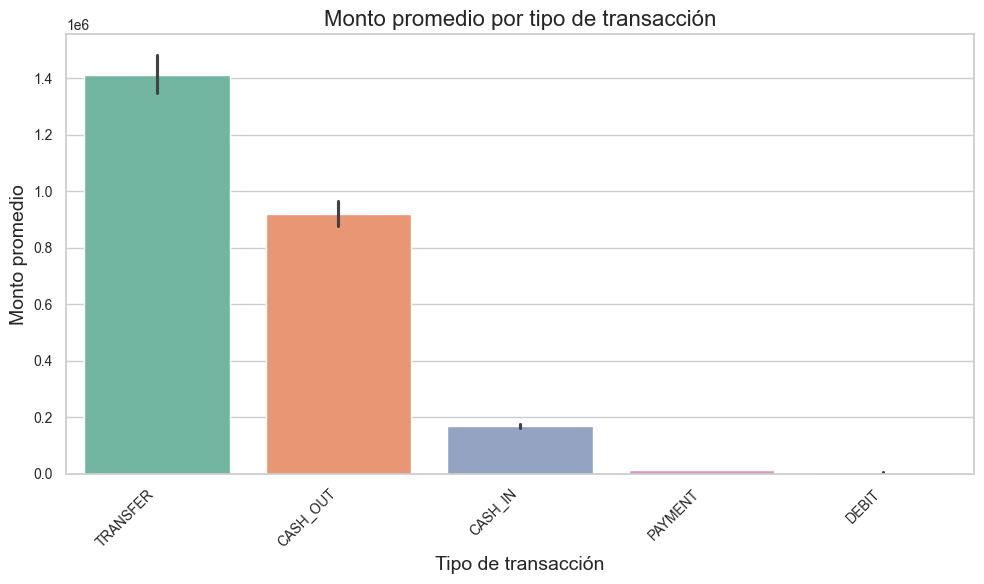

In [17]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial"
})

plt.figure()
ax = sns.barplot(
    x='type', 
    y='amount', 
    data=df_b, 
    palette="Set2", 
    order=df_b.groupby('type')['amount'].mean().sort_values(ascending=False).index
)
plt.title("Monto promedio por tipo de transacción")
plt.xlabel("Tipo de transacción")
plt.ylabel("Monto promedio")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

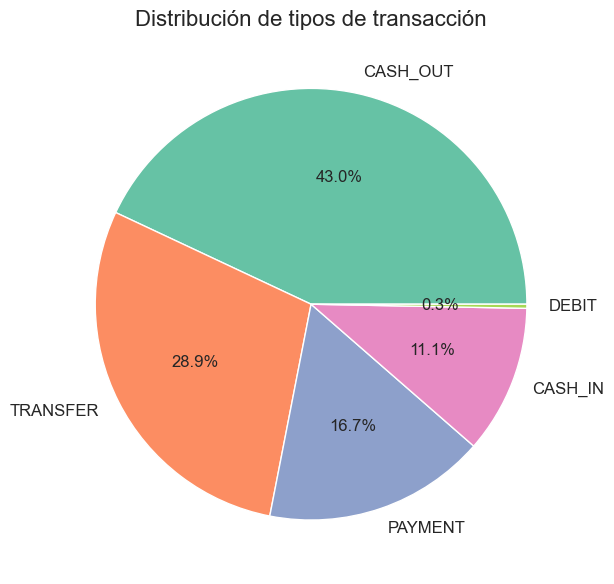

In [18]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial"
})

type_counts = df_b["type"].value_counts()
transactions = type_counts.index
quantity = type_counts.values

plt.figure()
plt.pie(
    quantity, 
    labels=transactions, 
    autopct='%1.1f%%', 
    colors=sns.color_palette("Set2", len(transactions)),
    textprops={'fontsize': 12}
)
plt.title("Distribución de tipos de transacción", fontsize=16)
plt.tight_layout()
plt.show()

# <p style="background-color:#003d15; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px; margin:0"> 3. Selección de Características</p>


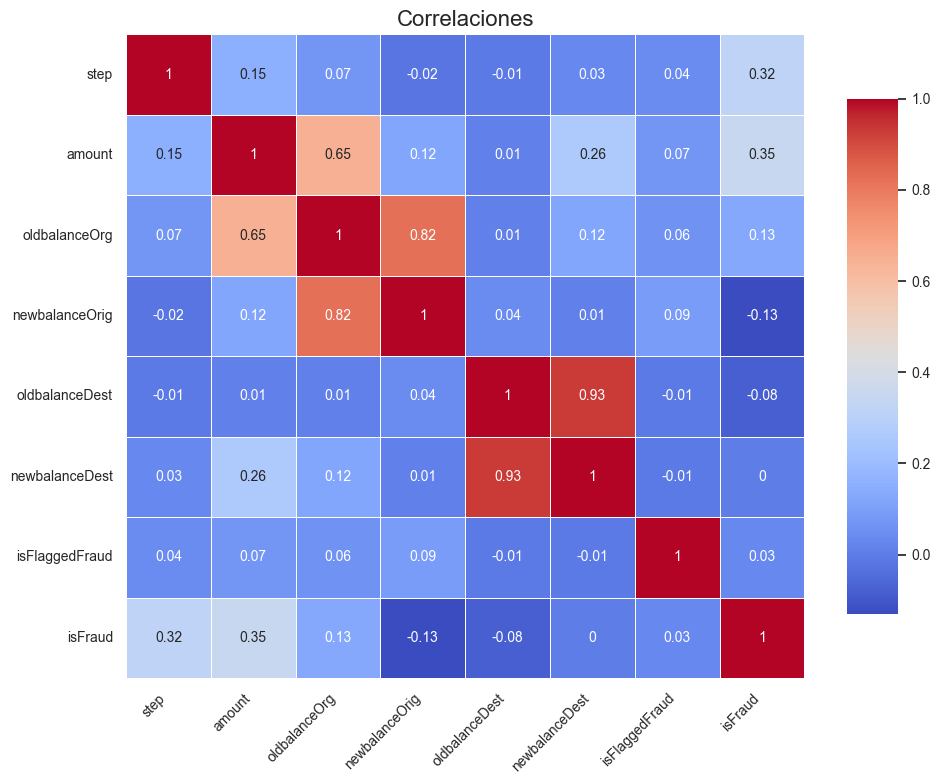

In [19]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 8), 
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial"
})

correlation = df_b.corr(numeric_only=True)

plt.figure()
sns.heatmap(
    correlation.round(2), 
    annot=True, 
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 10}, 
    cbar_kws={"shrink": 0.8, "aspect": 10} 
)
plt.title("Correlaciones", fontsize=16)
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

In [20]:
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial"
})

def plot_feature(feature):
    if df_b[feature].dtype in ['int64', 'float64']:
        plt.figure()
        sns.histplot(df_b[feature], bins=30, kde=True, color='skyblue')
        plt.title(f'Distribución de {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frecuencia')
        plt.figtext(0.5, 0.01, 'Interactive Feature Plot', ha='center', va='center', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna seleccionada '{feature}' no es numérica. Selecciona otra columna.")

dropdown = widgets.Dropdown(
    options=df_b.columns,
    description='Feature:',
    style={'description_width': 'initial'}
)

widgets.interact(plot_feature, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', options=('step', 'type', 'amount', 'oldbalanceOrg', 'ne…

In [21]:
X=df_b.drop("isFraud",axis=1)
y=df_b["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [22]:
cat_col = X_train.select_dtypes(include=["object"]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
O_H_E_train = encoder.fit_transform(X_train[cat_col])
one_hot_train_df = pd.DataFrame(O_H_E_train, columns=encoder.get_feature_names_out(cat_col))
X_train_encoded = pd.concat([X_train.drop(cat_col, axis=1).reset_index(drop=True), 
                              one_hot_train_df.reset_index(drop=True)], axis=1)
O_H_E_test = encoder.transform(X_test[cat_col])
one_hot_test_df = pd.DataFrame(O_H_E_test, columns=encoder.get_feature_names_out(cat_col))
X_test_encoded = pd.concat([X_test.drop(cat_col, axis=1).reset_index(drop=True), 
                             one_hot_test_df.reset_index(drop=True)], axis=1)

# <p style="background-color:#003d15; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px; margin:0"> 4. Modelo ML</p>


In [23]:
X_train = X_train_encoded
X_test = X_test_encoded

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.987303243760327

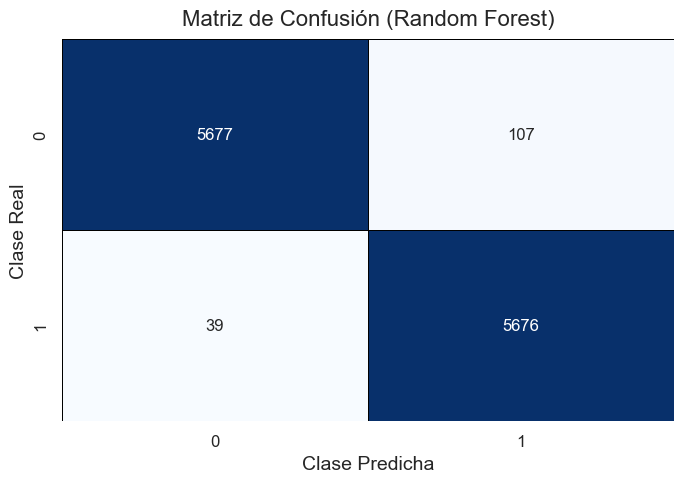

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar=False,
    linewidths=0.5, 
    linecolor='black',
    annot_kws={"size": 12}
)

plt.xlabel('Clase Predicha', fontsize=14)
plt.ylabel('Clase Real', fontsize=14)
plt.title('Matriz de Confusión (Random Forest)', fontsize=16, pad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

              precision  recall  f1-score   support
0                  0.99    0.98      0.99  5,784.00
1                  0.98    0.99      0.99  5,715.00
accuracy           0.99    0.99      0.99      0.99
macro avg          0.99    0.99      0.99 11,499.00
weighted avg       0.99    0.99      0.99 11,499.00


In [28]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train, y_train)
y_pred_DT = Model_DT.predict(X_test)

Train_Accuracy = Model_DT.score(X_train, y_train)
Test_Accuracy = Model_DT.score(X_test, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.04 %


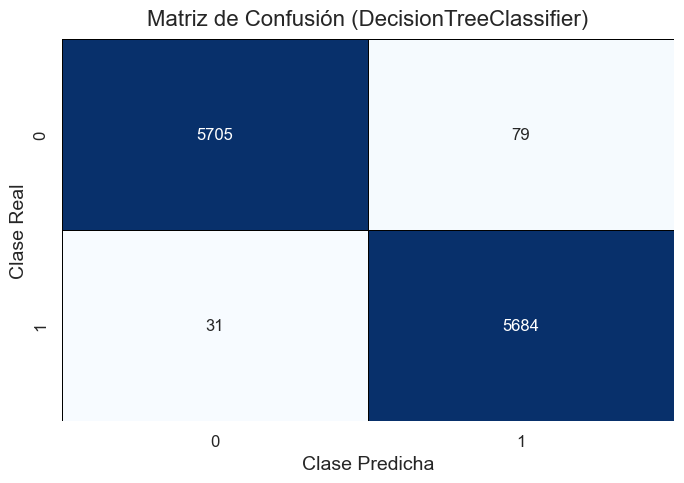

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_DT)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar=False,
    linewidths=0.5, 
    linecolor='black',
    annot_kws={"size": 12}
)

plt.xlabel('Clase Predicha', fontsize=14)
plt.ylabel('Clase Real', fontsize=14)
plt.title('Matriz de Confusión (DecisionTreeClassifier)', fontsize=16, pad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()